<a href="https://colab.research.google.com/github/jessikamorais/Metodos_Numericos/blob/main/M%C3%B3dulo_2_Exerc%C3%ADcio_10_ITEM_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RESOLUÇÃO DO ITEM 5.**

**Resolução do exercício 10_Artigo**: "*A Collection of 10 Numerical Problems in Chemical Engineering Solved by Various mathematical Software Packages*".

O problema consiste em um tanque agitado com aquecimento que opera de forma contínua e possui um contralador PI.

As equações para modelagem do sistema e controle são apresentadas a seguir:

____

$\frac{dT}{dt}=\frac{WC_p(T_i-T) + q}{\rho VC_{p}}$ ___ Equação A.40  
_____

$T_o(t) = t(T-\tau_d)$ ___ Equação A.41

____

$\frac{dT_o}{dt} = [T - T_o - (\frac{\tau _d}{2})(\frac{dT}{dt})] \frac{2}{\tau _d}$ ___Equação A.42
____

$\frac{dT_m}{dt}=\frac{T_o-T_m}{\tau_m}$ ___ Equação A.43

____

$q_{s}=WC_p(T_r - Tis)$ ___ Equação A.45

____

$\frac{d}{dT}(errsum)= T_r - T_m $ ___ Equação A.46

____

$q = Q_s + K_c(T_r - T-m) + \frac{K_c}{\tau _I}(errsum)$ ___ Equação A.47

____

**Item 5**. No item 5, é necessário calcular o fluxo de calor limite (qlim) cedido ao sistema. Neste caso, o fluxo calor limite irá variar entre 0 kJ/min e 26.000 kJ/min com base no fluxo de calor (q). Estes valores são apresentados na Figura 3. As temperaturas também são aprentadas para o sistema nas Figuras 1 e 2, considerando que a temperatura Tr (set-point) altera de 80°C para 90°C decorrido 10 minutos de operação do sistema.

In [1]:
#Importando as bibliotcas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from pylab import *

In [2]:
#Importando a pasta do github que será utilizada:
!git clone https://github.com/jessikamorais/Metodos_Numericos #clonar do Github
%cd Metodos_Numericos

fatal: destination path 'Metodos_Numericos' already exists and is not an empty directory.
/content/Metodos_Numericos


In [3]:
#Definindo as variáveis necessárias:

termo1 = 4000.0 #ro*V*Cp [kJ/°C]
Tis = 60 #Constante de tempo integral [°C]
TauD = 1 #Tempo morto, tempo que o sistema demora para atingir a T de Set point[min]
Kc = 5000 #Ganho proporcional [kJ/min °C]
termo2 = 500 # W*Cp [kJ/min °C] 
Tr = 80 #[°C] #Temperatura do SetPoint
TauM = 5 #[min] #Constante de tempo do termopar
TauI = 2 #[min]
t_plot = []
q_plot = []
qlim_plot = []
T_plot = []
ToPade_plot = []
Tm_plot = []

#Tm = #Temperatura lida no termopar [°C]
#To = #Temperatura de saída do tanque ou temperatura que entra no termopar
#Ti = #Temperatura de entrada
#Tis = #Temperatura de projeto de estado estacionário

#Condição inicial do sistema (t= 0 min):
T0 = Tr
To0Pade = Tr
Tm0 = Tr
derrsum0 = 0.0
Ti = 60.0

In [4]:
def model(Resp, t):

# Alterando o valor do SetPoint (Tr) com relação ao tempo:
  if t < 10.0:
    Tr = 80.0
  elif t >= 10.0:
    Tr = 90.0

  # Definindo as equações utilizadas:
  T, ToPade, Tm, derrsum  = Resp[0], Resp[1], Resp[2], Resp[3]
  To = T*(t - TauD) #Expressão para o tempo morto
  qs = termo2*(Tr-Ti) #Calor necessário para atingir o Set Point
  q = qs + Kc*(Tr-Tm) + (Kc/TauI)*derrsum #Calor que entra no tanque

  # Definindo os limites para o cálculo de qlim:

  if q < 0:
    qlim = 0
  elif q > 26000.0:
    qlim = 26000.0
  else:
    qlim = q

  # Definindo as Equações Diferenciais utilizadas:
  dT  = (termo2/(Ti-T)+q)/(termo1)
  dToPade = ((T - ToPade) - (TauD/2)*(dT))/(2/TauD) #Calculo para o efeito do tempo morto (aproximação de Padé)
  dTm = ((ToPade - Tm)/TauM) #Modelagem do termopar
  derrsum = (Tr - Tm) #Nova variável para calcular a integral de q

  #Capturando os valores para a construção de gráficos:
  t_plot.append(t)
  q_plot.append(q)
  qlim_plot.append(qlim)
  T_plot.append(T)
  ToPade_plot.append(ToPade)
  Tm_plot.append(Tm)

  
  return [dT, dToPade, dTm, derrsum]

In [5]:
#Importando a função de Runge Kutta de ordem 4:
from rk4_sys import rk4

In [6]:
# Resolvendo pelo Método de Runge Kutta de ordem 4:

t0 = 0.0
x0 = [T0, To0Pade, Tm0, derrsum0] 
tf = 1000.0

t, x = rk4( model, t0, tf,x0)


**Plotando os gráficos das temperaturas  T ,  To  e  Tm  em função do tempo.** *Figura 1*         
   

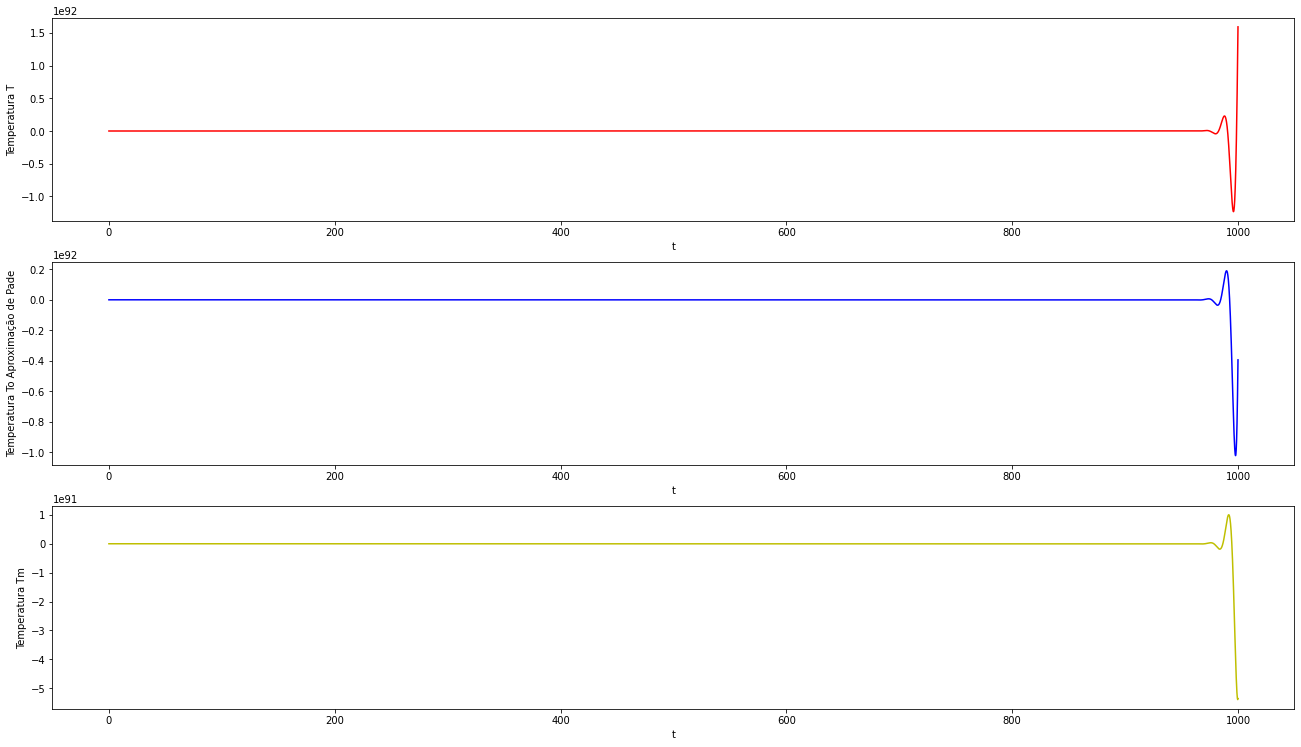

In [7]:
# Plotando os gráficos de temperatura com relação ao tempo:

fig, axs = plt.subplots(3)

#Plotando o gráfico de T em relação ao tempo:
axs[0].plot(t, x[:, 0], 'r')
axs[0].set(xlabel='t', ylabel='Temperatura T')

#Plotando o gráfico de To em relação ao tempo:
axs[1].plot(t, x[:, 1], 'b')
axs[1].set(xlabel='t', ylabel="Temperatura To Aproximação de Pade")

#Plotando o gráfico de Tm em relação ao tempo:
axs[2].plot(t, x[:, 2], 'y')
axs[2].set(xlabel='t', ylabel="Temperatura Tm")

#Ajustando o tamanho dos gráficos
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=3, 
                    top=2.5, 
                    wspace=0.8, 
                    hspace=0.20)
plt.show()


**Plotando um único gráfico para a comparação das temperaturas  T ,  To  e  Tm  em função do tempo.** *Figura 2*         



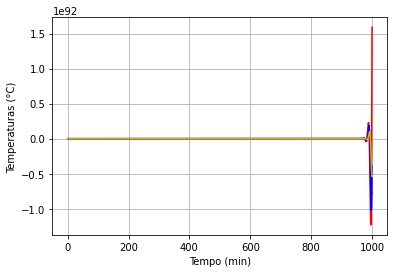

In [8]:
# Plotando o gráfico de temperaturas (T, ToPade, Tm) com relação ao tempo:
figure()
plot(t_plot, T_plot,'-r',t_plot, ToPade_plot,'-b',t_plot, Tm_plot,'-y')
ylabel('Temperaturas (°C)')
xlabel('Tempo (min)')
grid()

**Plotando um único gráfico para a comparação dos fluxos de calro q e qlim em função do tempo.** *Figura 3*         



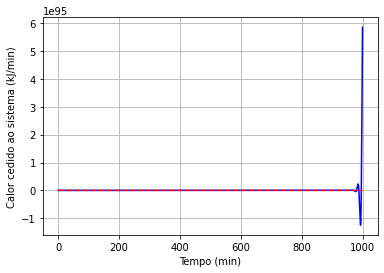

In [9]:
figure()
plot(t_plot, q_plot,'-b', t_plot, qlim_plot,'--r')
ylabel('Calor cedido ao sistema (kJ/min)')
xlabel('Tempo (min)')
grid ()